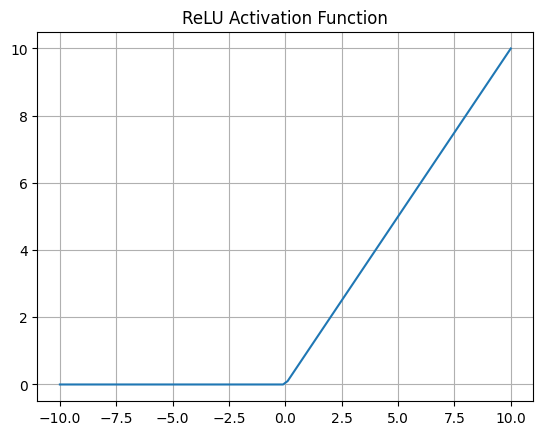

In [ ]:
## Activation Functions
##ReLU (Rectified Linear Unit) is one of the most commonly used activation functions in deep learning.
##It introduces non-linearity into the model, helping neural networks learn complex patterns.

##It's computationally efficient (just a max operation).

## Helps avoid vanishing gradient problems seen in sigmoid/tanh.

## Encourages sparse activation (many neurons output 0), improving performance and generalization.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
relu = np.maximum(0, x)

plt.plot(x, relu)
plt.title("ReLU Activation Function")
plt.grid()
plt.show()

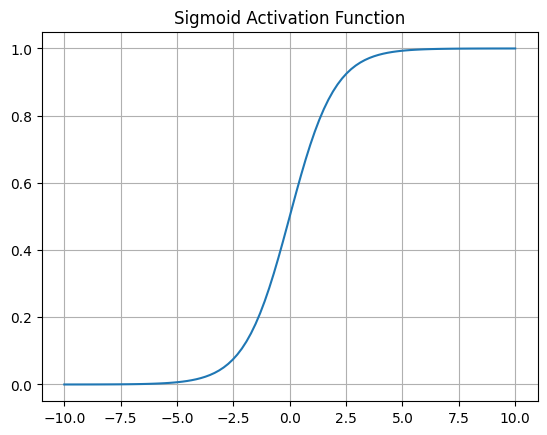

In [ ]:
## Sigmoid
##The Sigmoid function is a classic activation function used in neural networks, especially in binary classification tasks.
sigmoid = 1 / (1 + np.exp(-x))
plt.plot(x, sigmoid)
plt.title("Sigmoid Activation Function")
plt.grid()
plt.show()

In [ ]:
## Softmax
##Softmax is an activation function that:

##Converts a vector of numbers (logits) into probabilities.

##The sum of the output values is always 1.

##Commonly used in multi-class classification (e.g., classifying digits 0–9 in MNIST).

def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()

x = np.array([2.0, 1.0, 0.1])
print("Softmax Output:", softmax(x))










Softmax Output: [0.65900114 0.24243297 0.09856589]


In [ ]:
## Loss Functions & Optimizers
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [ ]:
##ANN: Customer Churn Prediction

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
            tf.keras.layers.Dense(8, activation='relu'),
                        tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

##adam: smart optimizer, adjusts learning rate automatically.

##binary_crossentropy: used for binary classification.

##accuracy: metric to track how well the model performs.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))



## o/p
## Epoch 1/20	Training pass 1 out of 20
## loss	Training loss (error) — lower is better
## accuracy	Training accuracy (how many correct) — higher is better
## val_loss	Validation loss on unseen data
## val_accuracy	Validation accuracy — important to check overfitting


## If accuracy increases and loss decreases over time → model is learning well.

## If training accuracy is high, but validation accuracy is low → model is overfitting.

## If both are low → model is underfitting, maybe too simple or not trained enough.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5879 - loss: 0.6793 - val_accuracy: 0.7450 - val_loss: 0.6490
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7912 - loss: 0.6381 - val_accuracy: 0.8150 - val_loss: 0.6015
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8113 - loss: 0.5837 - val_accuracy: 0.8250 - val_loss: 0.5486
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8441 - loss: 0.5294 - val_accuracy: 0.8250 - val_loss: 0.4933
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8450 - loss: 0.4789 - val_accuracy: 0.8250 - val_loss: 0.4427
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8557 - loss: 0.4269 - val_accuracy: 0.8500 - val_loss: 0.4011
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8647 - loss: 0.3936 - val_accuracy: 0.8700 - val_loss: 0.3603
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8643 - loss: 0.3579 - val_accuracy: 0.8750 - val_l

In [ ]:
##CNN Architectures

from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg_model.summary()

# o/p Conv2D: Extracts features (edges, textures) from the image.

## MaxPooling2D: Reduces image size (downsampling), helps reduce computation.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##CNN: Image Classification using MNIST
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)










model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
          tf.keras.layers.MaxPooling2D((2,2)),

              tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                  tf.keras.layers.MaxPooling2D((2,2)),

                      tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
                              ])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


## optimizer='adam' → Adjusts weights efficiently.

## loss='categorical_crossentropy' → Used for multi-class classification.

## metrics=['accuracy'] → You want to measure how accurate the model is.

# o/p Low loss, High accuracy (close to 100%).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 32ms/step - accuracy: 0.8974 - loss: 0.3276 - val_accuracy: 0.9842 - val_loss: 0.0509
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9839 - loss: 0.0525 - val_accuracy: 0.9894 - val_loss: 0.0339
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9892 - val_loss: 0.0309
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 31ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9859 - val_loss: 0.0417
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9900 - val_loss: 0.0318


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


## numpy: Used for numerical operations (not directly used here but often used with arrays).

## Tokenizer and pad_sequences: Preprocess text data (convert text into numbers).

## Sequential: Allows us to stack layers in order.

## Embedding: Converts words into dense vectors (word embeddings).

## SimpleRNN: A basic Recurrent Neural Network layer.

## Dense: Fully connected layer for classification.

# Sample sentences and labels
sentences = ['I love deep learning', 'RNNs are powerful', 'I enjoy learning AI', 'AI is the future']
labels = [1, 1, 1, 0]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Padding
X = pad_sequences(sequences)
y = np.array(labels)  # <-- FIX: convert labels to numpy array

model = Sequential([
      Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8),
              SimpleRNN(16),
                          Dense(1, activation='sigmoid')


                                      ])


## Embedding:

## Converts word indexes to 8-dimensional vectors.

## input_dim = vocab_size + 1 (1 is added because indexing starts at 1).

## SimpleRNN(16):

## RNN with 16 hidden units.

## Processes sequential input and maintains memory (used in NLP tasks).

## Dense(1, activation='sigmoid'):

## Output layer.

## neuron because it's binary classification.

## Sigmoid activation gives output between 0 and 1 (interpreted as probability).

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=10)

# o/p Low loss, High accuracy (close to 100%).

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7500 - loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7500 - loss: 0.6858
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6785
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 1.0000 - loss: 0.6714
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.6642
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6570
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.6498
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.6424
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.6350
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.6274
